## Loading the required Libaries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ST4052/project2/final.csv')
df.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,6014717,451,PAYMENT,8276.89,C1510341339,10891.0,2614.11,M1519448186,0.00,0.00,0,0
1,6014718,451,CASH_IN,190885.51,C340616062,100231.0,291116.51,C118179503,0.00,0.00,0,0
2,6014719,451,CASH_OUT,89829.37,C1854562922,10433.0,0.00,C1717181093,1102583.51,1192412.88,0,0
3,6014720,451,CASH_IN,88058.96,C455904834,6520.0,94578.96,C1862634094,4385056.84,4296997.88,0,0
4,6014721,451,CASH_OUT,79915.49,C1180872317,82956.0,3040.51,C1975448285,0.00,79915.49,0,0


In [ ]:
df.shape

(347903, 12)

## Creating the Training set and Test set considering the time series nature

In [ ]:
X = df.drop(['isFraud','isFlaggedFraud','Unnamed: 0'],axis=1)

In [ ]:
y = df[['isFraud','isFlaggedFraud']]

In [ ]:
nrows_df = len(X)

In [ ]:
train_set_size = nrows_df *0.8

In [ ]:
train_set_size

278322.4

In [ ]:
X_train = X.iloc[0:278321]
X_test = X.iloc[278321:nrows_df]

In [ ]:
y_train = y.iloc[0:278321]
y_test = y.iloc[278321:nrows_df]

In [ ]:
frames = [X_train,y_train]
train_df = pd.concat(frames,axis = 1)

In [ ]:
train_df.shape

(278321, 11)

In [ ]:
train_df.to_csv('trainset.csv')

In [ ]:
frames2 = [X_test,y_test]
test_df = pd.concat(frames2,axis = 1)
test_df.to_csv('testset.csv')

In [ ]:
test_df.shape

(69582, 11)

## Data Preperation and analysis

##Train set

In [ ]:
train_df.type.unique()

array(['PAYMENT', 'CASH_IN', 'CASH_OUT', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [ ]:
# Payment Fraud
Payment_df = train_df[train_df['type']=='PAYMENT']
sum(Payment_df['isFraud'])

0

In [ ]:
CashIn_df = train_df[train_df['type']=='CASH_IN']
sum(CashIn_df['isFraud'])

0

In [ ]:
train_df.isFraud.unique()

array([0, 1])

In [ ]:
CashOut_df = train_df[train_df['type']=='CASH_OUT']
sum(CashOut_df['isFraud'])

1150

In [ ]:
Transfer_df = train_df[train_df['type']=='TRANSFER']
sum(Transfer_df['isFraud'])

1150

In [ ]:
Debit_df = train_df[train_df['type']=='DEBIT']
sum(Debit_df['isFraud'])

0

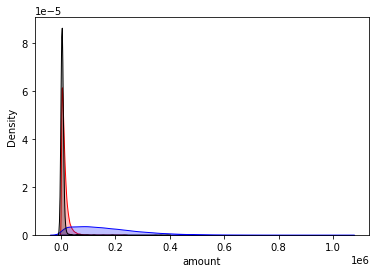

In [ ]:
## Plotting distribution plots for the amounts of above 4 types
fig = sns.kdeplot(Payment_df['amount'], shade=True, color="red")
fig = sns.kdeplot(CashIn_df['amount'], shade=True, color="blue")
fig = sns.kdeplot(Debit_df['amount'], shade=True, color="black")
plt.show()

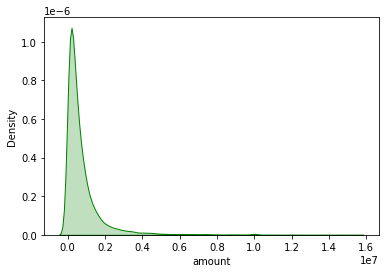

In [ ]:
fig = sns.kdeplot(Transfer_df['amount'], shade=True, color="green")
plt.show()

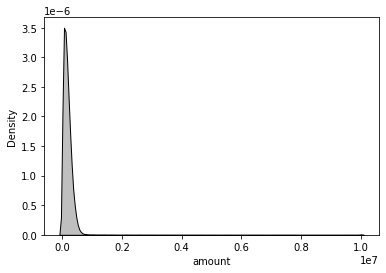

In [ ]:
fig = sns.kdeplot(CashOut_df['amount'], shade=True, color="black")
plt.show()

In [ ]:
transfer_df_fraud1 = train_df.loc[train_df['isFraud'] == 1, ['amount']][train_df['type'] == 'TRANSFER']
transfer_df_fraud0 = train_df.loc[train_df['isFraud'] == 0, ['amount']][train_df['type'] == 'TRANSFER']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


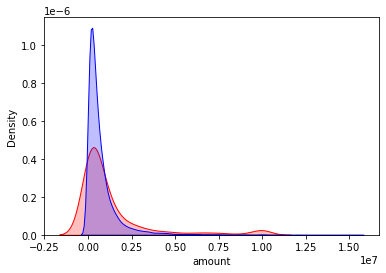

In [ ]:
fig = sns.kdeplot(transfer_df_fraud1['amount'], shade=True, color="red")
fig = sns.kdeplot(transfer_df_fraud0['amount'], shade=True, color="blue")
plt.show()

In [ ]:
unique_steps = X_train['step'].unique()
# unique_steps = train_df['step'].unique()

In [ ]:
len(unique_steps)

217

In [ ]:
n_row = train_df.shape[0]

In [ ]:
unique_steps_payments = Payment_df['step'].unique()
unique_steps_cash_in  = CashIn_df['step'].unique()
unique_steps_cash_out = CashOut_df['step'].unique()
unique_steps_transfer = Transfer_df['step'].unique()
unique_steps_debit = Debit_df['step'].unique()

In [ ]:
len(unique_steps_payments)

105

In [ ]:
unique_steps_payments

array([451, 452, 453, 454, 455, 458, 460, 461, 466, 469, 471, 472, 474,
       476, 478, 479, 483, 487, 490, 492, 493, 495, 496, 500, 502, 503,
       505, 509, 514, 517, 518, 520, 522, 524, 525, 526, 527, 528, 529,
       530, 531, 532, 534, 538, 540, 542, 544, 545, 546, 547, 548, 549,
       550, 551, 552, 555, 563, 564, 565, 566, 567, 569, 570, 571, 573,
       574, 576, 577, 578, 580, 582, 584, 585, 586, 587, 588, 589, 590,
       591, 592, 594, 595, 596, 597, 598, 599, 601, 608, 610, 612, 614,
       617, 619, 621, 630, 637, 640, 642, 644, 649, 656, 659, 661, 664,
       667])

In [ ]:
unique_steps_payments[6]

460

In [ ]:
s = X_train['step']
# s = train_df['step']
s

0         451
1         451
2         451
3         451
4         451
         ... 
278316    667
278317    667
278318    667
278319    667
278320    667
Name: step, Length: 278321, dtype: int64

In [ ]:
d_payment = list()
d_cashin = list()
d_cash_out = list()
d_transfer = list()
d_debit = list()

In [ ]:
for x in unique_steps_payments:
    New_df = Payment_df[Payment_df['step']== x]
    y = New_df['amount'].mean()
    d_payment.append(y) 

for x in unique_steps_cash_in:
    New_df = CashIn_df[CashIn_df['step']== x]
    y = New_df['amount'].mean()
    d_cashin.append(y) 

for x in unique_steps_cash_out:
    New_df = CashOut_df[CashOut_df['step']== x]
    y = New_df['amount'].mean()
    d_cash_out.append(y) 
    
for x in unique_steps_transfer:
    New_df = Transfer_df[Transfer_df['step']== x]
    y = New_df['amount'].mean()
    d_transfer.append(y) 
    
for x in unique_steps_debit:
    New_df = Debit_df[Debit_df['step']== x]
    y = New_df['amount'].mean()
    d_debit.append(y) 
       

In [ ]:
s[2]

451

In [ ]:
df_payment = pd.DataFrame(list(zip(unique_steps_payments,d_payment)),columns = ['step','mean_amount'])
df_cashin = pd.DataFrame(list(zip(unique_steps_cash_in,d_cashin)),columns = ['step','mean_amount'])
df_cashout = pd.DataFrame(list(zip(unique_steps_cash_out,d_cash_out)),columns = ['step','mean_amount'])
df_transfer = pd.DataFrame(list(zip(unique_steps_transfer,d_transfer)),columns = ['step','mean_amount'])
df_debit = pd.DataFrame(list(zip(unique_steps_debit,d_debit)),columns = ['step','mean_amount'])


In [ ]:
df_payment.head()
#df_payment.to_csv('payment.csv')

,step,mean_amount
0,451,9657.260511
1,452,10257.436286
2,453,11483.580909
3,454,6987.931875
4,455,12499.548020


In [ ]:
df_cashin.head()
df_cashin.to_csv('cashin.csv')

In [ ]:
df_cashout.head()
df_cashout.to_csv('cashout.csv')

In [ ]:
df_transfer.head()
df_transfer.to_csv('transfer.csv')

In [ ]:
df_debit.head()
df_debit.to_csv('debit.csv')

In [ ]:
df_with_counting_var = pd.DataFrame(list(zip(unique_steps)), columns=['step'])

In [ ]:
x = df_with_counting_var ['step']

In [ ]:
x

0      451
1      452
2      453
3      454
4      455
      ... 
212    663
213    664
214    665
215    666
216    667
Name: step, Length: 217, dtype: int64

In [ ]:
df_with_counting_var=df_with_counting_var.merge(df_payment,how = 'left',on ='step')


In [ ]:
df_with_counting_var= df_with_counting_var.merge(df_cashin,how = 'left',on ='step')

In [ ]:
df_with_counting_var.rename(columns = {'mean_amount_x':'Payment'}, inplace = True)
df_with_counting_var.rename(columns = {'mean_amount_y':'CashIn'}, inplace = True)

In [ ]:
df_with_counting_var= df_with_counting_var.merge(df_cashout,how = 'left',on ='step')

In [ ]:
df_with_counting_var = df_with_counting_var.merge(df_transfer,how = 'left',on ='step')

In [ ]:
df_with_counting_var = df_with_counting_var.merge(df_debit,how = 'left',on ='step')

In [ ]:
df_with_counting_var.rename(columns = {'mean_amount_x':'CashOut'}, inplace = True)
df_with_counting_var.rename(columns = {'mean_amount_y':'Transfer'}, inplace = True)

In [ ]:
df_with_counting_var.rename(columns = {'mean_amount':'Debit'}, inplace = True)

In [ ]:
df_with_counting_var

,step,Payment,CashIn,CashOut,Transfer,Debit
0,451,9657.260511,152735.098107,137034.829881,6.682071e+05,1474.600625
1,452,10257.436286,149847.700208,302595.437361,9.291160e+05,2201.305000
2,453,11483.580909,115640.904000,318898.875263,1.102770e+06,2615.960000
3,454,6987.931875,NaN,251486.417000,8.224683e+05,NaN
4,455,12499.548020,152217.594304,183193.301368,5.957161e+05,2443.058000
...,...,...,...,...,...,...
212,663,NaN,NaN,324207.230000,3.242072e+05,NaN
213,664,11543.667007,187691.423085,212774.482281,8.779970e+05,1084.223333
214,665,NaN,NaN,890481.730000,8.904817e+05,NaN
215,666,NaN,NaN,254547.850000,2.545479e+05,NaN


In [ ]:
print(df_with_counting_var['Payment'].isnull().sum())
print(df_with_counting_var['CashIn'].isnull().sum())
print(df_with_counting_var['CashOut'].isnull().sum())
print(df_with_counting_var['Transfer'].isnull().sum())
print(df_with_counting_var['Debit'].isnull().sum())

112
117
0
0
117


In [ ]:
# Missing Value imputation Using Mean

In [ ]:
# df_with_counting_var['Payment'] = df_with_counting_var['Payment'].fillna(df_with_counting_var['Payment'].mean())
# df_with_counting_var['CashIn'] = df_with_counting_var['CashIn'].fillna(df_with_counting_var['CashIn'].mean())
# df_with_counting_var['CashOut'] = df_with_counting_var['CashOut'].fillna(df_with_counting_var['CashOut'].mean())
# df_with_counting_var['Transfer'] = df_with_counting_var['Transfer'].fillna(df_with_counting_var['Transfer'].mean())
# df_with_counting_var['Debit'] = df_with_counting_var['Debit'].fillna(df_with_counting_var['Debit'].mean())

In [ ]:
df_with_counting_var['Payment'] = df_with_counting_var['Payment'].fillna(0)
df_with_counting_var['CashIn'] = df_with_counting_var['CashIn'].fillna(0)
df_with_counting_var['CashOut'] = df_with_counting_var['CashOut'].fillna(0)
df_with_counting_var['Transfer'] = df_with_counting_var['Transfer'].fillna(0)
df_with_counting_var['Debit'] = df_with_counting_var['Debit'].fillna(0)

In [ ]:
df_with_counting_var

,step,Payment,CashIn,CashOut,Transfer,Debit
0,451,9657.260511,152735.098107,137034.829881,6.682071e+05,1474.600625
1,452,10257.436286,149847.700208,302595.437361,9.291160e+05,2201.305000
2,453,11483.580909,115640.904000,318898.875263,1.102770e+06,2615.960000
3,454,6987.931875,0.000000,251486.417000,8.224683e+05,0.000000
4,455,12499.548020,152217.594304,183193.301368,5.957161e+05,2443.058000
...,...,...,...,...,...,...
212,663,0.000000,0.000000,324207.230000,3.242072e+05,0.000000
213,664,11543.667007,187691.423085,212774.482281,8.779970e+05,1084.223333
214,665,0.000000,0.000000,890481.730000,8.904817e+05,0.000000
215,666,0.000000,0.000000,254547.850000,2.545479e+05,0.000000


In [ ]:
df_with_counting_var.to_csv('big.csv') 

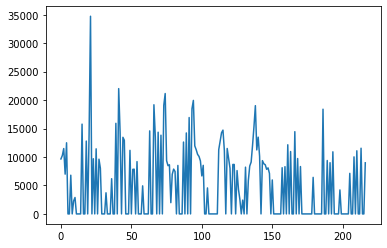

In [ ]:
plt.plot(df_with_counting_var['Payment'])

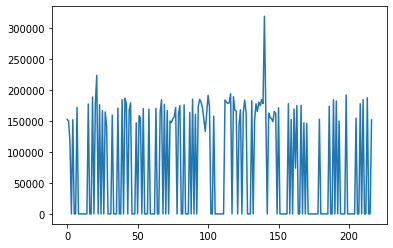

In [ ]:
plt.plot(df_with_counting_var['CashIn'])

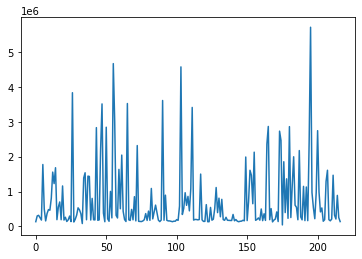

In [ ]:
plt.plot(df_with_counting_var['CashOut'])

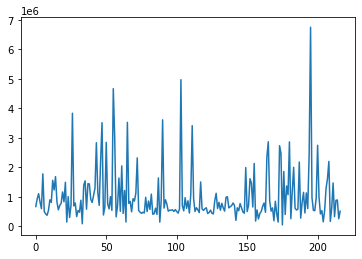

In [ ]:
plt.plot(df_with_counting_var['Transfer'])

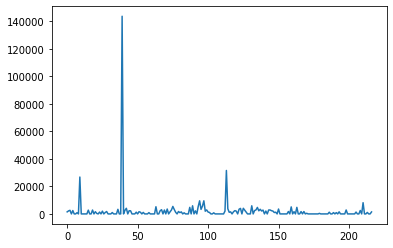

In [ ]:
plt.plot(df_with_counting_var['Debit'])

In [ ]:
df_with_counting_var2 = df_with_counting_var.drop(['step'],axis = 1)

In [ ]:
df_with_counting_var2

,Payment,CashIn,CashOut,Transfer,Debit
0,9657.260511,152735.098107,137034.829881,6.682071e+05,1474.600625
1,10257.436286,149847.700208,302595.437361,9.291160e+05,2201.305000
2,11483.580909,115640.904000,318898.875263,1.102770e+06,2615.960000
3,6987.931875,0.000000,251486.417000,8.224683e+05,0.000000
4,12499.548020,152217.594304,183193.301368,5.957161e+05,2443.058000
...,...,...,...,...,...
212,0.000000,0.000000,324207.230000,3.242072e+05,0.000000
213,11543.667007,187691.423085,212774.482281,8.779970e+05,1084.223333
214,0.000000,0.000000,890481.730000,8.904817e+05,0.000000
215,0.000000,0.000000,254547.850000,2.545479e+05,0.000000


In [ ]:
plt.boxplot(df_with_counting_var2)
plt.show()

In [ ]:
# Boxplot shows many outlying observations for 
# Calculating maximum bound for oulying observations in the boxplot
A=df_with_counting_var.quantile(0.25)
B=df_with_counting_var.quantile(0.75)

In [ ]:
# IQR for variable CashOut
IQR = B['CashOut']-A['CashOut']
UpperLimit = 1.5*IQR+B['CashOut']

In [ ]:
fraud_count = []
for x in unique_steps:
    New_df = train_df[train_df['step']== x]
    y = New_df['isFraud'].sum()
    fraud_count.append(y)

In [ ]:
df_with_counting_var['fraud_count'] = fraud_count

In [ ]:
df_with_counting_var

,step,Payment,CashIn,CashOut,Transfer,Debit,fraud_count
0,451,9657.260511,152735.098107,137034.829881,6.682071e+05,1474.600625,4
1,452,10257.436286,149847.700208,302595.437361,9.291160e+05,2201.305000,10
2,453,11483.580909,115640.904000,318898.875263,1.102770e+06,2615.960000,8
3,454,6987.931875,0.000000,251486.417000,8.224683e+05,0.000000,6
4,455,12499.548020,152217.594304,183193.301368,5.957161e+05,2443.058000,10
...,...,...,...,...,...,...,...
212,663,0.000000,0.000000,324207.230000,3.242072e+05,0.000000,10
213,664,11543.667007,187691.423085,212774.482281,8.779970e+05,1084.223333,20
214,665,0.000000,0.000000,890481.730000,8.904817e+05,0.000000,10
215,666,0.000000,0.000000,254547.850000,2.545479e+05,0.000000,6


In [ ]:
UpperLimit

1975849.3904848485

In [ ]:
# Suspected Outliers
sus_out_df = df_with_counting_var[df_with_counting_var['CashOut']> UpperLimit]

In [ ]:
sus = sus_out_df[['CashOut','fraud_count']]

In [ ]:
sus_out_df

,step,Payment,CashIn,CashOut,Transfer,Debit,fraud_count
26,477,0.0,0.0,3.832119e+06,3.832119e+06,0.0,10
43,494,0.0,0.0,2.832064e+06,2.832064e+06,0.0,8
46,497,0.0,0.0,2.209840e+06,2.209840e+06,0.0,20
47,498,0.0,0.0,3.511245e+06,3.511245e+06,0.0,12
50,501,0.0,0.0,2.843381e+06,2.843381e+06,0.0,28
55,506,0.0,0.0,4.666226e+06,4.666226e+06,0.0,8
56,507,0.0,0.0,3.007658e+06,3.007658e+06,0.0,14
61,512,0.0,0.0,2.045212e+06,2.045212e+06,0.0,12
65,516,0.0,0.0,3.522574e+06,3.522574e+06,0.0,14
72,523,0.0,0.0,2.318005e+06,2.318005e+06,0.0,30


In [ ]:
# Outlying observations and number of fraud transactions
plt.scatter(sus['CashOut'],sus['fraud_count'])
plt.show()

In [ ]:
df_with_counting_var.to_csv('counting_var_0.csv')

In [ ]:
df_with_counting_var['Average_amount'] = (df_with_counting_var['Payment']+df_with_counting_var['CashIn']+df_with_counting_var['CashOut']+df_with_counting_var['Transfer']+df_with_counting_var['Debit'])/4

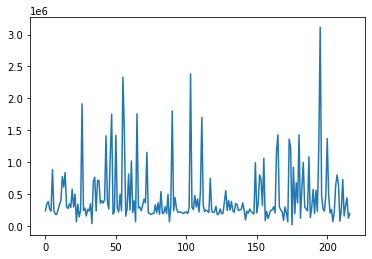

In [ ]:
plt.plot(df_with_counting_var['Average_amount'])

In [ ]:
# plt.scatter(df_with_counting_var['Average_amount'],df_with_counting_var['fraud_count'])

##Test set

In [ ]:
Payment_test_df = test_df[test_df['type']=='PAYMENT']
sum(Payment_test_df['isFraud'])

0

In [ ]:
cashin_test_df = test_df[test_df['type']=='CASH_IN']
sum(cashin_test_df['isFraud'])

0

In [ ]:
cashout_test_df = test_df[test_df['type']=='CASH_OUT']
sum(cashout_test_df['isFraud'])

428

In [ ]:
transfer_test_df = test_df[test_df['type']=='TRANSFER']
sum(transfer_test_df['isFraud'])

428

In [ ]:
debit_test_df = test_df[test_df['type']=='DEBIT']
sum(debit_test_df['isFraud'])

0

In [ ]:
unique_steps_test = X_test['step'].unique()

In [ ]:
len(unique_steps_test)

77

In [ ]:
n_row_test = test_df.shape[0]
n_row_test

69582

In [ ]:
unique_test_steps_payments = Payment_test_df['step'].unique()
unique_test_steps_cash_in  = cashin_test_df['step'].unique()
unique_test_steps_cash_out = cashout_test_df['step'].unique()
unique_test_steps_transfer = transfer_test_df['step'].unique()
unique_test_steps_debit = debit_test_df['step'].unique()

In [ ]:
len(unique_test_steps_payments)

30

In [ ]:
unique_test_steps_payments

array([667, 669, 670, 672, 673, 675, 679, 681, 683, 684, 686, 687, 688,
       690, 691, 692, 694, 695, 698, 699, 705, 707, 709, 710, 712, 714,
       715, 716, 717, 718])

In [ ]:
# a = pd.DataFrame(test_df[test_df['step'] == 667][df['type'] == 'PAYMENT']['amount'])
# a.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<bound method NDFrame.head of           amount
278323   8134.63
278330  12166.36
278334   3525.86
278338  12812.81
278339   1647.66
...          ...
279026   8741.11
279027  15172.60
279028   2793.06
279029  10031.45
279046   3934.05

[239 rows x 1 columns]>

In [ ]:
# a['amount'].mean()

8780.288158995816

In [ ]:
# test_df[test_df['step'] == 669][df['type'] == 'PAYMENT']['amount']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


279060     6929.26
279062     5459.36
279063     5851.40
279064    23205.92
279066    12587.05
            ...   
279366     8171.02
279367     2903.02
279368    13274.89
279374      237.04
279375    14098.85
Name: amount, Length: 73, dtype: float64

In [ ]:
unique_test_steps_payments[5]

675

In [ ]:
d_payment_test = list()
d_cashin_test = list()
d_cash_out_test = list()
d_transfer_test = list()
d_debit_test = list()

In [ ]:
for x in unique_test_steps_payments:
    New_df = Payment_test_df[Payment_test_df['step']== x]
    y = New_df['amount'].mean()
    d_payment_test.append(y) 

for x in unique_test_steps_cash_in:
    New_df = cashin_test_df[cashin_test_df['step']== x]
    y = New_df['amount'].mean()
    d_cashin_test.append(y) 

for x in unique_test_steps_cash_out:
    New_df = cashout_test_df[cashout_test_df['step']== x]
    y = New_df['amount'].mean()
    d_cash_out_test.append(y) 
    
for x in unique_test_steps_transfer:
    New_df = transfer_test_df[transfer_test_df['step']== x]
    y = New_df['amount'].mean()
    d_transfer_test.append(y) 
    
for x in unique_test_steps_debit:
    New_df = debit_test_df[debit_test_df['step']== x]
    y = New_df['amount'].mean()
    d_debit_test.append(y) 
       

In [ ]:
df_payment_test = pd.DataFrame(list(zip(unique_test_steps_payments,d_payment_test)),columns = ['step','mean_amount'])
df_cashin_test = pd.DataFrame(list(zip(unique_test_steps_cash_in,d_cashin_test)),columns = ['step','mean_amount'])
df_cashout_test = pd.DataFrame(list(zip(unique_test_steps_cash_out,d_cash_out_test)),columns = ['step','mean_amount'])
df_transfer_test = pd.DataFrame(list(zip(unique_test_steps_transfer,d_transfer_test)),columns = ['step','mean_amount'])
df_debit_test = pd.DataFrame(list(zip(unique_test_steps_debit,d_debit_test)),columns = ['step','mean_amount'])

In [ ]:
df_payment_test
#df_payment.to_csv('payment.csv')

,step,mean_amount
0,667,8780.288159
1,669,8669.552192
2,670,8269.033421
3,672,4467.593393
4,673,7116.244330
5,675,1627.596000
6,679,4919.276286
7,681,12229.639185
8,683,11973.106526
9,684,14604.706685


In [ ]:
df_with_counting_test_var = pd.DataFrame(list(zip(unique_steps_test)), columns=['step'])

In [ ]:
x = df_with_counting_test_var ['step']
x

0     667
1     668
2     669
3     670
4     671
     ... 
72    739
73    740
74    741
75    742
76    743
Name: step, Length: 77, dtype: int64

In [ ]:
df_with_counting_test_var=df_with_counting_test_var.merge(df_payment_test,how = 'left',on ='step')


In [ ]:
df_with_counting_test_var= df_with_counting_test_var.merge(df_cashin_test,how = 'left',on ='step')

In [ ]:
df_with_counting_test_var.rename(columns = {'mean_amount_x':'Payment'}, inplace = True)
df_with_counting_test_var.rename(columns = {'mean_amount_y':'CashIn'}, inplace = True)

In [ ]:
df_with_counting_test_var= df_with_counting_test_var.merge(df_cashout_test,how = 'left',on ='step')

In [ ]:
df_with_counting_test_var = df_with_counting_test_var.merge(df_transfer_test,how = 'left',on ='step')

In [ ]:
df_with_counting_test_var = df_with_counting_test_var.merge(df_debit_test,how = 'left',on ='step')

In [ ]:
df_with_counting_test_var.rename(columns = {'mean_amount_x':'CashOut'}, inplace = True)
df_with_counting_test_var.rename(columns = {'mean_amount_y':'Transfer'}, inplace = True)

In [ ]:
df_with_counting_test_var.rename(columns = {'mean_amount':'Debit'}, inplace = True)

In [ ]:
df_with_counting_test_var

,step,Payment,CashIn,CashOut,Transfer,Debit
0,667,8780.288159,151641.112178,1.329884e+05,6.199682e+05,1318.250000
1,668,NaN,NaN,3.361313e+06,3.361313e+06,NaN
2,669,8669.552192,164712.668158,2.530960e+05,7.319843e+05,840.035000
3,670,8269.033421,156022.360929,2.038944e+05,5.641840e+05,1350.949167
4,671,NaN,NaN,3.382607e+06,3.764945e+06,NaN
...,...,...,...,...,...,...
72,739,NaN,NaN,1.658783e+06,1.658783e+06,NaN
73,740,NaN,NaN,1.272161e+06,1.272161e+06,NaN
74,741,NaN,NaN,3.734293e+06,4.250161e+06,NaN
75,742,NaN,NaN,1.023124e+06,1.023124e+06,NaN


In [ ]:
# missing value imputation 

In [ ]:
print(df_with_counting_test_var['Payment'].isnull().sum())
print(df_with_counting_test_var['CashIn'].isnull().sum())
print(df_with_counting_test_var['CashOut'].isnull().sum())
print(df_with_counting_test_var['Transfer'].isnull().sum())
print(df_with_counting_test_var['Debit'].isnull().sum())

47
50
0
0
49


NULL values were replaced by zero, because any transaction has not happened during that hour and given transaction type

In [ ]:
df_with_counting_test_var['Payment'] = df_with_counting_test_var['Payment'].fillna(0)
df_with_counting_test_var['CashIn'] = df_with_counting_test_var['CashIn'].fillna(0)
df_with_counting_test_var['CashOut'] = df_with_counting_test_var['CashOut'].fillna(0)
df_with_counting_test_var['Transfer'] = df_with_counting_test_var['Transfer'].fillna(0)
df_with_counting_test_var['Debit'] = df_with_counting_test_var['Debit'].fillna(0)

In [ ]:
df_with_counting_test_var

,step,Payment,CashIn,CashOut,Transfer,Debit
0,667,8780.288159,151641.112178,1.329884e+05,6.199682e+05,1318.250000
1,668,0.000000,0.000000,3.361313e+06,3.361313e+06,0.000000
2,669,8669.552192,164712.668158,2.530960e+05,7.319843e+05,840.035000
3,670,8269.033421,156022.360929,2.038944e+05,5.641840e+05,1350.949167
4,671,0.000000,0.000000,3.382607e+06,3.764945e+06,0.000000
...,...,...,...,...,...,...
72,739,0.000000,0.000000,1.658783e+06,1.658783e+06,0.000000
73,740,0.000000,0.000000,1.272161e+06,1.272161e+06,0.000000
74,741,0.000000,0.000000,3.734293e+06,4.250161e+06,0.000000
75,742,0.000000,0.000000,1.023124e+06,1.023124e+06,0.000000


In [ ]:
df_with_counting_test_var2 = df_with_counting_test_var.drop(['step'],axis = 1)

In [ ]:
df_with_counting_test_var2

,Payment,CashIn,CashOut,Transfer,Debit
0,8780.288159,151641.112178,1.329884e+05,6.199682e+05,1318.250000
1,0.000000,0.000000,3.361313e+06,3.361313e+06,0.000000
2,8669.552192,164712.668158,2.530960e+05,7.319843e+05,840.035000
3,8269.033421,156022.360929,2.038944e+05,5.641840e+05,1350.949167
4,0.000000,0.000000,3.382607e+06,3.764945e+06,0.000000
...,...,...,...,...,...
72,0.000000,0.000000,1.658783e+06,1.658783e+06,0.000000
73,0.000000,0.000000,1.272161e+06,1.272161e+06,0.000000
74,0.000000,0.000000,3.734293e+06,4.250161e+06,0.000000
75,0.000000,0.000000,1.023124e+06,1.023124e+06,0.000000


In [ ]:
# plt.boxplot(df_with_counting_test_var2)
# plt.show()

In [ ]:
# Boxplot shows many outlying observations for 
# Calculating maximum bound for oulying observations in the boxplot
A=df_with_counting_test_var.quantile(0.25)
B=df_with_counting_test_var.quantile(0.75)

In [ ]:
# IQR for variable CashOut
IQR_test = B['CashOut']-A['CashOut']
UpperLimit_test = 1.5*IQR_test+B['CashOut']

In [ ]:
fraud_count_test = []
for x in unique_steps_test:
    New_df = test_df[test_df['step']== x]
    y = New_df['isFraud'].sum()
    fraud_count_test.append(y)

In [ ]:
df_with_counting_test_var['fraud_count'] = fraud_count_test

In [ ]:
######### check before running 
# df_with_counting_test_var.drop(['mean_amount'], axis=1, inplace=True)

In [ ]:
df_with_counting_test_var.head()

,step,Payment,CashIn,CashOut,Transfer,Debit,fraud_count
0,667,8780.288159,151641.112178,1.329884e+05,6.199682e+05,1318.250000,2
1,668,0.000000,0.000000,3.361313e+06,3.361313e+06,0.000000,8
2,669,8669.552192,164712.668158,2.530960e+05,7.319843e+05,840.035000,8
3,670,8269.033421,156022.360929,2.038944e+05,5.641840e+05,1350.949167,12
4,671,0.000000,0.000000,3.382607e+06,3.764945e+06,0.000000,18


In [ ]:
UpperLimit_test

3732723.736705112

In [ ]:
# Suspected Outliers
sus_out_df_test = df_with_counting_test_var[df_with_counting_test_var['CashOut']> UpperLimit_test]

In [ ]:
sus_test = sus_out_df_test[['CashOut','fraud_count']]

In [ ]:
sus_out_df_test

,step,Payment,CashIn,CashOut,Transfer,Debit,fraud_count
10,677,0.0,0.0,5.508138e+06,5.508138e+06,0.0,8
35,702,0.0,0.0,4.446113e+06,4.899125e+06,0.0,14
74,741,0.0,0.0,3.734293e+06,4.250161e+06,0.0,22


In [ ]:
df_with_counting_test_var.to_csv('counting_Var_test_0.csv')